In [1]:
import sympy as sp

Symbolic Variables

In [2]:
t, l1, l2, m1, m2, g= sp.symbols('t, l1, l2, m1, m2, g',positive=True)

Generalized Coordinates

In [3]:
phi1, phi2=sp.Function('phi1')(t), sp.Function('phi2')(t)

Cartesian Coordinates

In [5]:
x1=l1*sp.sin(phi1)
y1=l1*sp.cos(phi1)
x2=x1+l2*sp.sin(phi2)
y2=y1+l2*sp.cos(phi2)

Cartesian Velocities

In [6]:
dot_x1=x1.diff(t)
dot_y1=y1.diff(t)
dot_x2=x2.diff(t)
dot_y2=y2.diff(t)

Kinetic Energy

In [7]:
T=sp.simplify(sp.Rational(1,2)*m1*(dot_x1**2+dot_y1**2)+sp.Rational(1,2)*m2*(dot_x2**2+dot_y2**2))
T.expand()

l1**2*m1*Derivative(phi1(t), t)**2/2 + l1**2*m2*Derivative(phi1(t), t)**2/2 + l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*m2*Derivative(phi2(t), t)**2/2

Potential Energy ($y$ increases downwards)

In [8]:
U=sp.simplify(-m1*g*y1-m2*g*y2)
U

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t)))

Lagrangian

In [9]:
Lag=(T-U).simplify()
Lag

g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) + l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

Canonical Momenta

In [10]:
mom_1=sp.simplify(Lag.diff(phi1.diff(t)).expand())
mom_2=sp.simplify(Lag.diff(phi2.diff(t)).expand())

In [11]:
mom_1

l1*(l1*m1*Derivative(phi1(t), t) + l1*m2*Derivative(phi1(t), t) + l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), t))

Solve velocities in terms of momenta

In [12]:
p1,p2=sp.Function('p1')(t),sp.Function('p2')(t)

The function **solve** finds the solution to the system of equations $mom_i=p_i$ for $\dot\phi_i$, and its output is a dictionary

In [13]:
sols=sp.solve([sp.Eq(mom_1,p1),sp.Eq(mom_2,p2)],[phi1.diff(t),phi2.diff(t)])

$\dot\phi_1$

In [14]:
sols[phi1.diff(t)]

-l1*p2(t)*cos(phi1(t) - phi2(t))/(l1**2*l2*m1 - l1**2*l2*m2*cos(phi1(t) - phi2(t))**2 + l1**2*l2*m2) + l2*p1(t)/(l1**2*l2*m1 - l1**2*l2*m2*cos(phi1(t) - phi2(t))**2 + l1**2*l2*m2)

$\dot\phi_2$

In [15]:
sols[phi2.diff(t)]

l1*m1*p2(t)/(l1*l2**2*m1*m2 - l1*l2**2*m2**2*cos(phi1(t) - phi2(t))**2 + l1*l2**2*m2**2) + l1*m2*p2(t)/(l1*l2**2*m1*m2 - l1*l2**2*m2**2*cos(phi1(t) - phi2(t))**2 + l1*l2**2*m2**2) - l2*m2*p1(t)*cos(phi1(t) - phi2(t))/(l1*l2**2*m1*m2 - l1*l2**2*m2**2*cos(phi1(t) - phi2(t))**2 + l1*l2**2*m2**2)

## Hamiltonian $p_i\dot\phi_i-L$

Energy as a function of coordinates and velocities

In [16]:
E=mom_1*phi1.diff(t)+mom_2*phi2.diff(t)-Lag
E

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) - l1**2*m1*Derivative(phi1(t), t)**2/2 + l1*(l1*m1*Derivative(phi1(t), t) + l1*m2*Derivative(phi1(t), t) + l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), t))*Derivative(phi1(t), t) + l2*m2*(l1*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t) + l2*Derivative(phi2(t), t))*Derivative(phi2(t), t) - m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

Legendre Transform

In [17]:
H=sp.simplify(E.subs([(phi1.diff(t),sols[phi1.diff(t)]),(phi2.diff(t),sols[phi2.diff(t)])]))

In [18]:
H

(-g*l1**3*l2**2*m1**2*m2*cos(phi1(t)) + g*l1**3*l2**2*m1*m2**2*cos(phi1(t) - phi2(t))**2*cos(phi1(t)) - 2*g*l1**3*l2**2*m1*m2**2*cos(phi1(t)) + g*l1**3*l2**2*m2**3*cos(phi1(t) - phi2(t))**2*cos(phi1(t)) - g*l1**3*l2**2*m2**3*cos(phi1(t)) - g*l1**2*l2**3*m1*m2**2*cos(phi2(t)) + g*l1**2*l2**3*m2**3*cos(phi1(t) - phi2(t))**2*cos(phi2(t)) - g*l1**2*l2**3*m2**3*cos(phi2(t)) + l1**2*m1*p2(t)**2/2 + l1**2*m2*p2(t)**2/2 - l1*l2*m2*p1(t)*p2(t)*cos(phi1(t) - phi2(t)) + l2**2*m2*p1(t)**2/2)/(l1**2*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

## Canonical Equations: $\dot\phi_i=\frac{\partial H}{\partial p_i}$, $\dot p_i=-\frac{\partial H}{\partial \phi_i}$

$\dot\phi_1$

In [19]:
dot_phi1=(H.diff(p1)).simplify()
dot_phi1

(-l1*p2(t)*cos(phi1(t) - phi2(t)) + l2*p1(t))/(l1**2*l2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

$\dot\phi_2$

In [20]:
dot_phi2=(H.diff(p2)).simplify()
dot_phi2

(l1*m1*p2(t) + l1*m2*p2(t) - l2*m2*p1(t)*cos(phi1(t) - phi2(t)))/(l1*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

$\dot p_1$

In [21]:
dot_p1=-(H.diff(phi1)).simplify()
dot_p1

-(g*l1**3*l2**2*m1**3*sin(phi1(t)) - 2*g*l1**3*l2**2*m1**2*m2*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 + 3*g*l1**3*l2**2*m1**2*m2*sin(phi1(t)) + g*l1**3*l2**2*m1*m2**2*sin(phi1(t))*cos(phi1(t) - phi2(t))**4 - 4*g*l1**3*l2**2*m1*m2**2*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 + 3*g*l1**3*l2**2*m1*m2**2*sin(phi1(t)) + g*l1**3*l2**2*m2**3*sin(phi1(t))*cos(phi1(t) - phi2(t))**4 - 2*g*l1**3*l2**2*m2**3*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 + g*l1**3*l2**2*m2**3*sin(phi1(t)) - l1**2*m1*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 - l1**2*m2*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 + l1*l2*m1*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) + l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t))*cos(phi1(t) - phi2(t))**2 + l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) - l2**2*m2*p1(t)**2*sin(2*phi1(t) - 2*phi2(t))/2)/(l1**2*l2**2*(m1**2 - 2*m1*m2*cos(phi1(t) - phi2(t))**2 + 2*m1*m2 + m2**2*cos(phi1(t) - phi2(t))**4 - 2*m2**2*cos(phi1(t) - phi2(t))**2 + m2**2))

$\dot p_2$

In [22]:
dot_p2=-(H.diff(phi2)).simplify()
dot_p2

-(g*l1**2*l2**3*m1**2*m2*sin(phi2(t)) - 2*g*l1**2*l2**3*m1*m2**2*sin(phi2(t))*cos(phi1(t) - phi2(t))**2 + 2*g*l1**2*l2**3*m1*m2**2*sin(phi2(t)) + g*l1**2*l2**3*m2**3*sin(phi2(t))*cos(phi1(t) - phi2(t))**4 - 2*g*l1**2*l2**3*m2**3*sin(phi2(t))*cos(phi1(t) - phi2(t))**2 + g*l1**2*l2**3*m2**3*sin(phi2(t)) + l1**2*m1*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 + l1**2*m2*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 - l1*l2*m1*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) - l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t))*cos(phi1(t) - phi2(t))**2 - l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) + l2**2*m2*p1(t)**2*sin(2*phi1(t) - 2*phi2(t))/2)/(l1**2*l2**2*(m1**2 - 2*m1*m2*cos(phi1(t) - phi2(t))**2 + 2*m1*m2 + m2**2*cos(phi1(t) - phi2(t))**4 - 2*m2**2*cos(phi1(t) - phi2(t))**2 + m2**2))

## Convert the symbolic canonical equations into numerical ones

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
num_dot_phi1=sp.lambdify([t,l1,l2,m1,m2,g,phi1,phi2,p1,p2],dot_phi1)
num_dot_phi2=sp.lambdify([t,l1,l2,m1,m2,g,phi1,phi2,p1,p2],dot_phi2)
num_dot_p1=sp.lambdify([t,l1,l2,m1,m2,g,phi1,phi2,p1,p2],dot_p1)
num_dot_p2=sp.lambdify([t,l1,l2,m1,m2,g,phi1,phi2,p1,p2],dot_p2)

Numerical Solution: fixing the parameters of the model

In [25]:
g_num=9.8 # m/s^2
l1_num=0.5  # m
l2_num=1.0  # m
m1_num=2.0 # kg
m2_num=1.0 # kg


Auxiliary function for the integration of the system of first order equations

In [30]:
def derivatives(S,t):
  phi1_num,phi2_num,p1_num,p2_num=S
  dphi1dt=num_dot_phi1(t,l1_num,l2_num,m1_num,m2_num,g_num,phi1_num,phi2_num,p1_num,p2_num)
  dphi2dt=num_dot_phi2(t,l1_num,l2_num,m1_num,m2_num,g_num,phi1_num,phi2_num,p1_num,p2_num)
  dp1dt=num_dot_p1(t,l1_num,l2_num,m1_num,m2_num,g_num,phi1_num,phi2_num,p1_num,p2_num)
  dp2dt=num_dot_p2(t,l1_num,l2_num,m1_num,m2_num,g_num,phi1_num,phi2_num,p1_num,p2_num)
  return np.array([dphi1dt,dphi2dt,dp1dt,dp2dt])

Time frame

In [26]:
t0,tmax,dt=0.0,30.0,0.01 ## Initial time, final time and time step (s)
time= np.arange(t0,tmax+dt,dt)

We generate two solutions that differ only by a small amount in one initial condition

In [28]:
from scipy.integrate import odeint

In [40]:
answer1=odeint(derivatives,[3*np.pi/7,3*np.pi/4,0.2,0.4],time)

In [46]:
answer2=odeint(derivatives,[3*np.pi/7,3*np.pi/4,0.201,0.4],time)

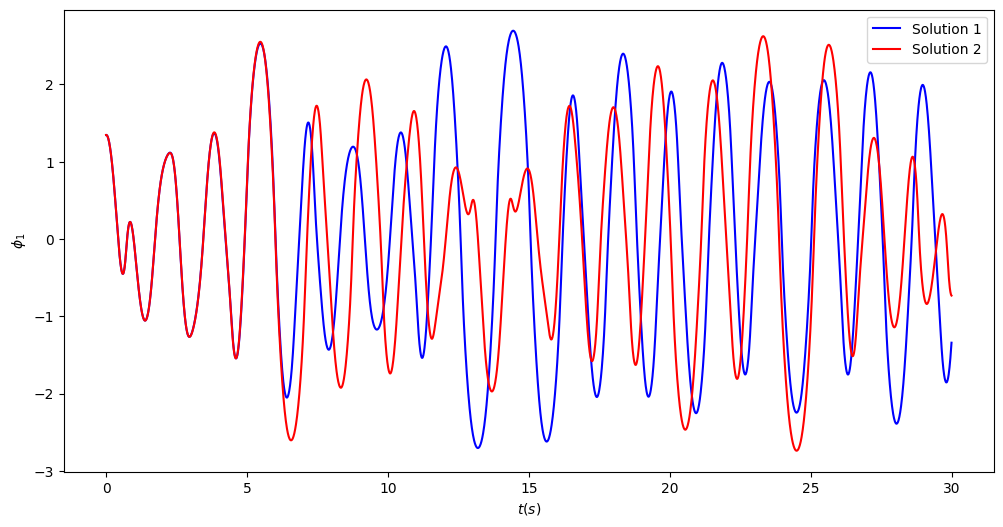

In [48]:
fig1,ax1= plt.subplots(figsize=(12,6))
ax1.plot(time,answer1[:,0],'b',label=f'Solution 1')
ax1.plot(time,answer2[:,0],'r',label=f'Solution 2')
ax1.set_xlabel(r'$t(s)$')
ax1.set_ylabel(r'$\phi_1$')
ax1.legend()